In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle as pickle

from classifiers import Neural_Net
import sys
sys.path.append('..')
from cs231n.classifiers import neural_net
import Gradient_Check

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_model(choose):
    model = None
    np.random.seed(0)
    if choose == 'my':
        model = Neural_Net.twolayer_net(input_size, hidden_size, num_classes, std=1e-1)
    elif choose == 'example':
        model = neural_net.TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)
    return model

def init_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

net_my = init_model('my')
net_example = init_model('example')
X, Y = init_data()

In [12]:
#测试自己写的代码和别人写的代码的运行结果
#首先是score
scores_my = net_my.loss(X)
scores_example = net_example.loss(X)
print(scores_my)


[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


In [13]:
#其次是loss
loss_my, grad_my = net_my.loss(X, Y, reg = 0.05)

check gradient

In [14]:
for grad_name in grad_my:
    #用loss来进行数值grad计算，因为在反向传播时是对loss进行求导的
    f = lambda no_use: net_my.loss(X, Y, reg = 0.05)[0]
    #net_my.param[grad_name]相当于把地址传进去了，直接改变net_my.param的参数值，因此和lambda函数选什么变量做参数无关
    num_grad = Gradient_Check.gradient_check_nn(f, net_my.param[grad_name], verbose=False)
    error = rel_error(num_grad, grad_my[grad_name])
    print('%s max relative error: %e' % (grad_name, error))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


对模型进行训练，并画出loss的图像

Final training loss:  0.017149672727854913


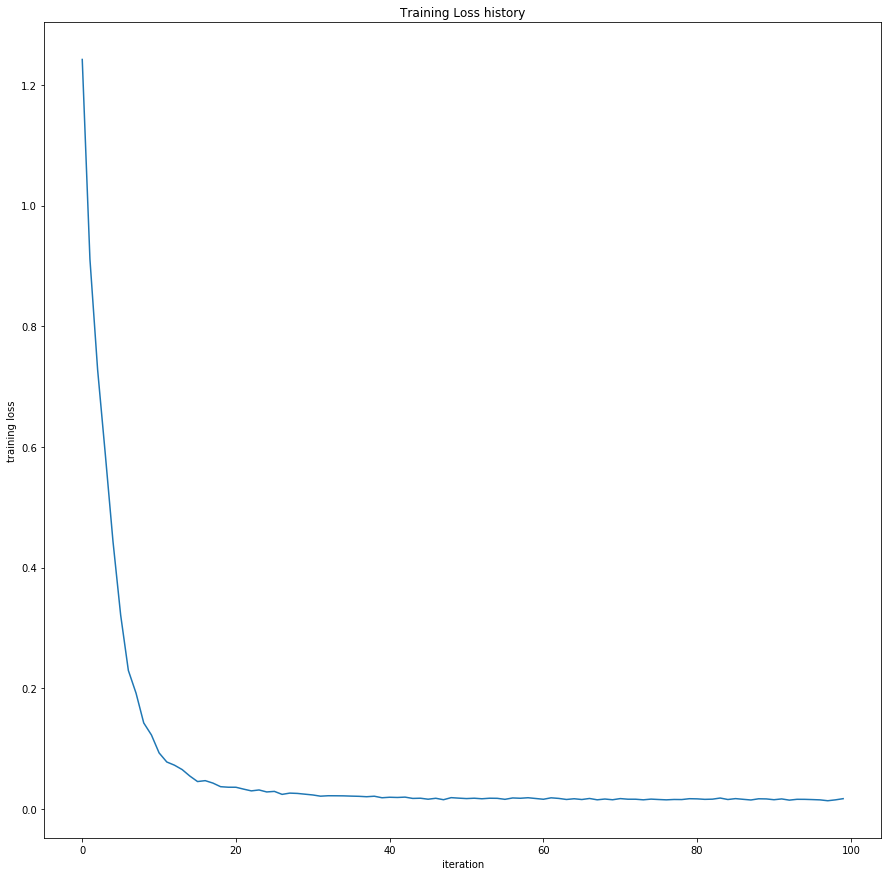

In [15]:
net = init_model('my')
stats = net.train(X, Y, X, Y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)
print('Final training loss: ', stats['loss_history'][-1])
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

加载数据

In [16]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        dataset = pickle.load(f, encoding='latin1')
        X = dataset['data']
        X = np.reshape(X, (10000, 3, 32, 32)).transpose(0, 2, 3, 1).astype('float')
        Y = dataset['labels']
        Y = np.array(Y)
    return X, Y

path = '../cs231n/datasets/cifar-10-batches-py'
xs = []
ys = []
for i in range(1,6):
    filename = os.path.join(path, 'data_batch_%d' % (i, ))
    X, Y = load_CIFAR_batch(filename)
    xs.append(X)
    ys.append(Y)
Xtr = np.concatenate(xs)
Ytr = np.concatenate(ys)
filename_test = os.path.join(path, 'test_batch')
Xtest, Ytest = load_CIFAR_batch(filename_test)
print(Xtr.shape)
print(Ytest.shape)


(50000, 32, 32, 3)
(10000,)


画出训练集的部分图像

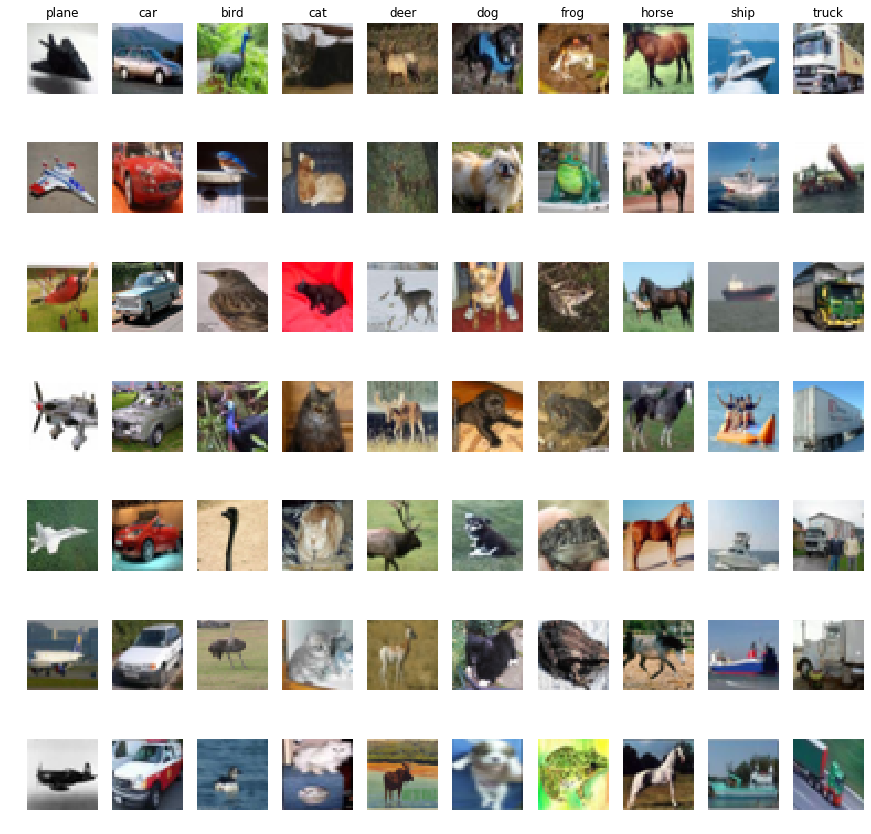

In [17]:
def plot_image(Xtr, Ytr, classes):
    num_row = 7
    num_column = len(classes)
    for i in range(num_column):
        index_total = np.where(Ytr == i)[0]
        index_use = index_total[0:num_row]
        for j, idx in enumerate(index_use):
            index = j * 10 + i + 1
            plt.subplot(num_row, num_column, index)
            plt.imshow(Xtr[idx].astype('uint8'))
            plt.axis('off')
            if j == 0:
                plt.title(classes[i])
    plt.show()
      
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_image(Xtr, Ytr, classes)

取实验数据的一部分进行训练以减少计算量

In [ ]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

X_train = Xtr[0: num_training]

Y_train = Ytr[0: num_training]

X_val = Xtr[num_training: num_training + num_validation]
Y_val = Ytr[num_training: num_training + num_validation]

dev_index = np.random.choice(range(num_training), num_dev)
X_dev = Xtr[dev_index]
Y_dev = Ytr[dev_index]

X_test = Xtest[0: num_test]
Y_test = Ytest[0: num_test]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', Y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', Y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


对数据进行处理

In [ ]:
#将X参数扁平化
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

#将X减去训练集中X参数的平均数
X_mean = np.mean(X_train, axis=0)

X_train -= X_mean
X_val -= X_mean
X_dev -= X_mean
X_test -= X_mean

编写画出在训练集以及验证集的准确率图像的函数
编写可视化W1的函数

In [ ]:
def plot_data(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], c= 'red', label= 'train')
    plt.plot(stats['val_acc_history'], c= 'blue', label= 'val')
    plt.legend()
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.show()

def show_net_weights(net):
    plt.figure(figsize= (10, 20))
    W1 = net.param['W1']
    W1 = np.reshape(W1, (32, 32, 3, -1))
    W1 = 255 * (W1 - np.min(W1)) / (np.max(W1) - np.min(W1))
    for i in range(W1.shape[3]):
        plt.subplot(10, 10, i + 1)
        plt.imshow(W1[:, :, :, i].astype('uint8'))
        plt.axis('off')

接下来是调参环节，来获得尽量高的准确率

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
num_inputs = num_training
final_net = Neural_Net.twolayer_net(input_size, hidden_size, num_classes)
final_stats = final_net.train(X_train, Y_train, X_val, Y_val,
            num_iters=5000, batch_size=200,
            learning_rate=2e-3, learning_rate_decay=0.95,
            reg=0.4)
pre_val = final_net.predict(X_val)
acc_val = np.mean(pre_val == Y_val)
show_net_weights(final_net)
plot_data(final_stats)
print('Validation accuracy: ', acc_val)

接下来开始在测试集上进行预测

In [ ]:
pre_test = final_net.predict(X_test)
acc_test = np.mean(pre_test == Y_test)
print('Test accuracy: ', acc_test)

将预测结果可视化

In [ ]:
num_pic = 16
size = int(np.sqrt(num_pic))
random_index = np.random.choice(range(X_test.shape[0]), num_pic)
pic_selected = X_test[random_index]
pic_max = np.max(pic_selected)
pic_min = np.min(pic_selected)
pic_selected = 255 * (pic_selected - pic_min) / (pic_max - pic_min)
pic_selected = np.reshape(pic_selected, (num_pic, 32, 32, 3))
for i in range(size):
    for j in range(size):
        index = size * i + j
        plt.subplot(size, size, index + 1)
        plt.imshow(pic_selected[index].astype('uint8'))
        plt.title('predict:%s, ture:%s' % (classes[pre_test[random_index[index]]], classes[Y_test[random_index[index]]]))
        plt.axis('off')
